In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from constants import *
from maths import gaussian
from markov import MarkovModel

State Probability Functions (1)
===================

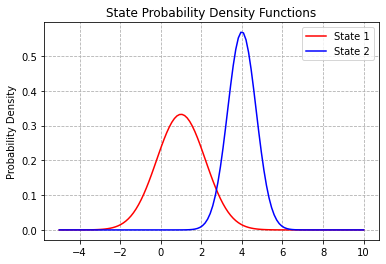

In [2]:
x = np.linspace(-5, 10, 120)

state_1_y = [gaussian(i, state1.mean, state1.std_dev) for i in x]
state_2_y = [gaussian(i, state2.mean, state2.std_dev) for i in x]

plt.plot(x, state_1_y, c='r', label="State 1")
plt.plot(x, state_2_y, c='b', label="State 2")

plt.legend()
plt.title("State Probability Density Functions")

plt.ylabel("Probability Density")
plt.grid(linestyle="--")

plt.show()

Output Probability Densities (2)
==========

In [3]:
for obs in observations:
    print(f'{obs} -> State 1: {gaussian(obs, state1.mean, state1.std_dev)}, State 2: {gaussian(obs, state2.mean, state2.std_dev)}')

3.8 -> State 1: 0.02185157424475792, State 2: 0.5471239427774459
4.2 -> State 1: 0.009496655019831194, State 2: 0.5471239427774459
3.4 -> State 1: 0.04499247209432338, State 2: 0.3947074079064296
-0.4 -> State 1: 0.16833223796171576, State 2: 1.500652790137751e-09
1.9 -> State 1: 0.2509478601290037, State 2: 0.006331212017054291
3.0 -> State 1: 0.08289761566062391, State 2: 0.2054255182126689
1.6 -> State 1: 0.2933877723035829, State 2: 0.001596702666402633
1.9 -> State 1: 0.2509478601290037, State 2: 0.006331212017054291
5.0 -> State 1: 0.0012852324969092556, State 2: 0.2054255182126689


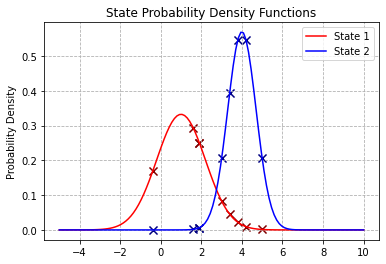

In [4]:
x = np.linspace(-5, 10, 120)

state_1_y = [gaussian(i, state1.mean, state1.std_dev) for i in x]
state_2_y = [gaussian(i, state2.mean, state2.std_dev) for i in x]

plt.plot(x, state_1_y, c='r', label="State 1")
plt.plot(x, state_2_y, c='b', label="State 2")

plt.legend()
plt.title("State Probability Density Functions")

plt.ylabel("Probability Density")
plt.grid(linestyle="--")

state1_pd = [gaussian(i, state1.mean, state1.std_dev) for i in observations]
state2_pd = [gaussian(i, state2.mean, state2.std_dev) for i in observations]

#############################################
#             Observation Marks  
#############################################

config = {
    "s": 65,
    "marker": 'x'
}

plt.scatter(observations, state1_pd, color=(0.5, 0, 0), **config)
plt.scatter(observations, state2_pd, color=(0, 0, 0.5), **config)

plt.show()

# Forward Procedure (3)

In [5]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)
model.populate_forward()

print(model.forward[:, -1])

# model.forward
model.p_observations_forward


[5.63267096e-10 6.02373446e-09]


1.9197737567283167e-10

# Backward Procedure (4)

In [6]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)
model.populate_backward()

# model.backward
model.p_observations_backward


7 5.0
6 1.9
5 1.6
4 3.0
3 1.9
2 -0.4
1 3.4
0 4.2


2.0542341126222686e-10

# Compare Forward/Backward Final

In [7]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)
model.populate_forward()
model.populate_backward()

print("forward:", model.p_observations_forward)
print("backward:", model.p_observations_backward)


7 5.0
6 1.9
5 1.6
4 3.0
3 1.9
2 -0.4
1 3.4
0 4.2
forward: 1.9197737567283167e-10
backward: 2.0542341126222686e-10
